In [1]:
exec(open("init_notebook.py").read())

current working dirF:\myProjects\av\junction-art


In [2]:
import pyodrx 
import numpy as np
import extensions
import matplotlib.pyplot as plt
%matplotlib inline

analizing roads 0 1
analizing roads 0 2
analizing roads 0 3
analizing roads 0 4
analizing roads 0 5
analizing roads 0 6
analizing roads 1 2
analizing roads 1 3
analizing roads 1 4
analizing roads 1 5
analizing roads 1 6
analizing roads 2 3
analizing roads 2 4
analizing roads 2 5
analizing roads 2 6
analizing roads 3 4
analizing roads 3 5
analizing roads 3 6
analizing roads 4 5
analizing roads 4 6
analizing roads 5 6
opening matplot lib


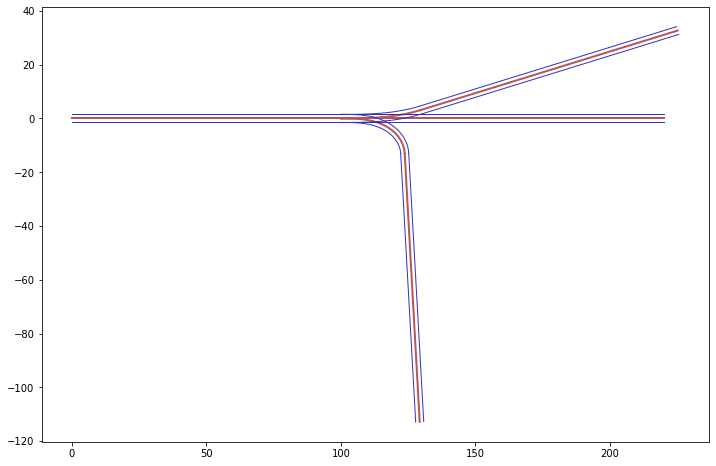

In [3]:

rm = pyodrx.RoadMark(pyodrx.RoadMarkType.solid,0.2,rule=pyodrx.MarkRule.no_passing)

# create geometries

geoms = []
geoms.append(pyodrx.Line(100))
geoms.append(pyodrx.Spiral(0.001,0.019,30))
geoms.append(pyodrx.Line(100))
geoms.append(pyodrx.Spiral(-0.001,-0.1,30))
geoms.append(pyodrx.Line(100))
geoms.append(pyodrx.Line(20))
geoms.append(pyodrx.Line(100))
numberofroads = len(geoms)

# create planviews
planviews = []
for g in geoms:
    pv = pyodrx.PlanView()
    pv.add_geometry(g)
    planviews.append(pv)



# create centerlanes
lanecenters = []
for i in range(numberofroads):
    lc = pyodrx.Lane(a=3)
    lc.add_roadmark(rm)
    lanecenters.append(lc)

# create lanes
rightlanes = []
leftlanes = []
for i in range(numberofroads):
    right = pyodrx.Lane(a=3)
    right.add_roadmark(rm)
    rightlanes.append(right)
    left = pyodrx.Lane(a=3)
    left.add_roadmark(rm)
    leftlanes.append(left)

# create lanesections
lanesections = []
for i in range(numberofroads):
    lsec = pyodrx.LaneSection(0,lanecenters[i])
    lsec.add_right_lane(rightlanes[i])
    lsec.add_left_lane(leftlanes[i])
    lanesections.append(lsec)

## create lanes
lanes = []
for l in lanesections:
    lanes1 = pyodrx.Lanes()
    lanes1.add_lanesection(l)
    lanes.append(lanes1)


# finally create the roads 
roads = []
roadtypes = [-1,1,-1,1,-1,1,-1]
for i in range(numberofroads):
    roads.append(pyodrx.Road(i,planviews[i],lanes[i],road_type=roadtypes[i]))

roads[0].add_successor(pyodrx.ElementType.junction,1)

roads[1].add_predecessor(pyodrx.ElementType.road,0,pyodrx.ContactPoint.end)
roads[1].add_successor(pyodrx.ElementType.road,2,pyodrx.ContactPoint.start)

roads[2].add_predecessor(pyodrx.ElementType.junction,1)

roads[3].add_predecessor(pyodrx.ElementType.road,0,pyodrx.ContactPoint.end)
roads[3].add_successor(pyodrx.ElementType.road,4,pyodrx.ContactPoint.start)

roads[4].add_predecessor(pyodrx.ElementType.junction,1)

roads[5].add_predecessor(pyodrx.ElementType.road,0,pyodrx.ContactPoint.end)
roads[5].add_successor(pyodrx.ElementType.road,6,pyodrx.ContactPoint.start)

roads[6].add_predecessor(pyodrx.ElementType.junction,1)

# create the opendrive
odr = pyodrx.OpenDrive('myroad')
for r in roads:
    odr.add_road(r)

# create junction
junction = pyodrx.Junction('test',1)
con1 = pyodrx.Connection(0,1,pyodrx.ContactPoint.start)
con1.add_lanelink(-1,-1)
con2 = pyodrx.Connection(0,3,pyodrx.ContactPoint.start)
con2.add_lanelink(-1,-1)
con3 = pyodrx.Connection(0,5,pyodrx.ContactPoint.start)
con3.add_lanelink(-1,-1)

con4 = pyodrx.Connection(2,1,pyodrx.ContactPoint.end)
con4.add_lanelink(1,1)
con5 = pyodrx.Connection(4,3,pyodrx.ContactPoint.end)
con5.add_lanelink(1,1)
con6 = pyodrx.Connection(6,5,pyodrx.ContactPoint.end)
con6.add_lanelink(1,1)

junction.add_connection(con1)
junction.add_connection(con2)
junction.add_connection(con3)
junction.add_connection(con4)
junction.add_connection(con5)
junction.add_connection(con6)

# odr.create_junction()
odr.add_junction(junction)
odr.adjust_roads_and_lanes()
# pyodrx.prettyprint(odr.get_element())
extensions.view_road(odr,os.path.join('..','F:\\myProjects\\av\\esmini'))